In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Data Collection , analysis and preprocessing

In [49]:
data = pd.read_csv('BHP.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [50]:
data.shape

(13320, 9)

In [51]:
data.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [52]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [53]:
data.describe()

,bath,balcony,price
count,13247.000000,12712.000000,13320.000000
mean,2.692610,1.584330,112.565627
std,1.341458,0.817248,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [54]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          608
price              0
dtype: int64

In [55]:
data.dropna(inplace=True)
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

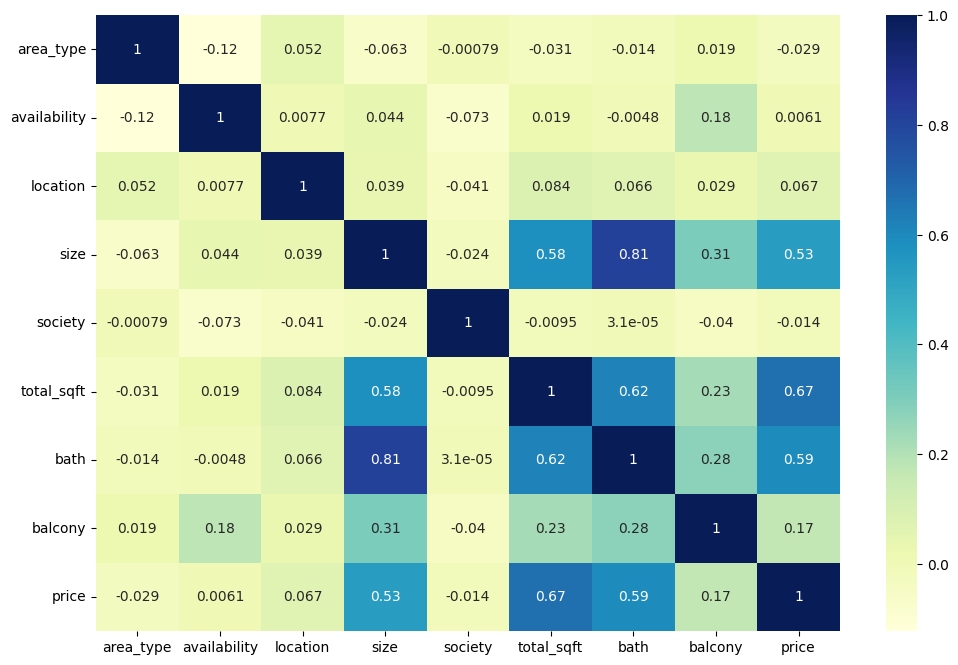

In [56]:
colm= ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df=data.copy()
categorical_columns = ['area_type', 'availability', 'location', 'society', 'size'] 
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df['total_sqft'] =  pd.to_numeric(df['total_sqft'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

corr_matrix = df[colm].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


In [57]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [58]:
data.describe()

,bath,price
count,7497.000000,7497.000000
mean,2.458583,96.871413
std,0.881249,105.382726
min,1.000000,8.000000
25%,2.000000,49.500000
50%,2.000000,69.760000
75%,3.000000,105.000000
max,9.000000,2700.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7497 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7497 non-null   object 
 1   size        7497 non-null   object 
 2   total_sqft  7497 non-null   object 
 3   bath        7497 non-null   float64
 4   price       7497 non-null   float64
dtypes: float64(2), object(3)
memory usage: 351.4+ KB


In [60]:
data['location'].value_counts()

location
Whitefield         397
Sarjapur  Road     310
Electronic City    236
Kanakpura Road     216
Thanisandra        212
                  ... 
Adarsh Nagar         1
S R Layout           1
Sadduguntepalya      1
BCC Layout           1
Abshot Layout        1
Name: count, Length: 634, dtype: int64

In [61]:
data['location']=data['location'].fillna('Sarjapur Road')

In [62]:
data['size'].value_counts()

size
2 BHK        3411
3 BHK        3012
1 BHK         353
4 BHK         348
4 Bedroom     193
3 Bedroom     120
5 Bedroom      16
2 Bedroom      16
1 RK           10
5 BHK           9
6 BHK           3
6 Bedroom       3
11 BHK          1
9 BHK           1
7 BHK           1
Name: count, dtype: int64

In [63]:
data['size'] = data['size'].fillna('2 BHK')

In [64]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7497 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7497 non-null   object 
 1   size        7497 non-null   object 
 2   total_sqft  7497 non-null   object 
 3   bath        7497 non-null   float64
 4   price       7497 non-null   float64
dtypes: float64(2), object(3)
memory usage: 351.4+ KB


In [66]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [67]:
#data[data.bhk >20]

In [68]:
data['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [69]:
def converRange(x):

    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [70]:
data['total_sqft']=data['total_sqft'].apply(converRange)

In [71]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4


In [72]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

In [73]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
3         6245.890861
5         3247.863248
6         7467.057101
             ...     
13313     4237.918216
13314     6530.612245
13315     6689.834926
13317     5258.545136
13318    10407.336319
Name: price_per_sqft, Length: 7497, dtype: float64

In [74]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7482.00000,7497.000000,7497.000000,7497.000000,7482.000000
mean,1507.67970,2.458583,96.871413,2.529679,5992.255375
std,935.12793,0.881249,105.382726,0.733376,9160.243855
min,11.00000,1.000000,8.000000,1.000000,371.428571
25%,1115.00000,2.000000,49.500000,2.000000,4279.387166
50%,1310.00000,2.000000,69.760000,2.000000,5319.148936
75%,1656.00000,3.000000,105.000000,3.000000,6698.751166
max,36000.00000,9.000000,2700.000000,11.000000,672727.272727


In [75]:
data['location'].value_counts()

location
Whitefield         397
Sarjapur  Road     310
Electronic City    236
Kanakpura Road     216
Thanisandra        212
                  ... 
Adarsh Nagar         1
S R Layout           1
Sadduguntepalya      1
BCC Layout           1
Abshot Layout        1
Name: count, Length: 634, dtype: int64

In [76]:
data['location'] = data['location'].apply(lambda x : x.strip())
location_count = data['location'].value_counts()

In [77]:
location_count

location
Whitefield         398
Sarjapur  Road     310
Electronic City    238
Kanakpura Road     216
Thanisandra        215
                  ... 
HAL 2nd Stage        1
Adarsh Nagar         1
S R Layout           1
Sadduguntepalya      1
Abshot Layout        1
Name: count, Length: 626, dtype: int64

In [78]:
location_count_less10 = location_count[location_count<=10]
location_count_less10

location
Arekere            10
Amruthahalli       10
BTM Layout         10
Vidyaranyapura     10
Jalahalli East     10
                   ..
HAL 2nd Stage       1
Adarsh Nagar        1
S R Layout          1
Sadduguntepalya     1
Abshot Layout       1
Name: count, Length: 483, dtype: int64

In [79]:
data['location']=data['location'].apply(lambda x : 'other' if x in location_count_less10 else x)

In [80]:
data['location'].value_counts()

location
other                 1443
Whitefield             398
Sarjapur  Road         310
Electronic City        238
Kanakpura Road         216
                      ... 
AECS Layout             11
Neeladri Nagar          11
Bharathi Nagar          11
Billekahalli            11
Pattandur Agrahara      11
Name: count, Length: 144, dtype: int64

In [81]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7482.00000,7497.000000,7497.000000,7497.000000,7482.000000
mean,1507.67970,2.458583,96.871413,2.529679,5992.255375
std,935.12793,0.881249,105.382726,0.733376,9160.243855
min,11.00000,1.000000,8.000000,1.000000,371.428571
25%,1115.00000,2.000000,49.500000,2.000000,4279.387166
50%,1310.00000,2.000000,69.760000,2.000000,5319.148936
75%,1656.00000,3.000000,105.000000,3.000000,6698.751166
max,36000.00000,9.000000,2700.000000,11.000000,672727.272727


In [82]:
(data['total_sqft']/data['bhk']).describe()

count     7482.000000
mean       588.437071
std        224.953702
min          3.666667
25%        500.000000
50%        567.333333
75%        632.500000
max      11666.666667
dtype: float64

In [83]:
data = data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,1512.206252,2.458602,96.972601,2.527016,5851.237404
std,935.500514,0.875750,105.545678,0.728002,2705.348723
min,350.000000,1.000000,10.000000,1.000000,371.428571
25%,1120.000000,2.000000,49.952500,2.000000,4283.397683
50%,1312.000000,2.000000,69.845000,2.000000,5321.395063
75%,1660.000000,3.000000,105.000000,3.000000,6694.574201
max,36000.000000,9.000000,2700.000000,11.000000,76530.612245


In [84]:
data.shape

(7440, 7)

In [85]:
data.price_per_sqft.describe()

count     7440.000000
mean      5851.237404
std       2705.348723
min        371.428571
25%       4283.397683
50%       5321.395063
75%       6694.574201
max      76530.612245
Name: price_per_sqft, dtype: float64

In [86]:
def remove_outliers_sqrt(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]

        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
data = remove_outliers_sqrt(data)
data.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,1439.500564,2.398772,82.320318,2.484394,5446.572210
std,630.119164,0.815208,56.685766,0.699261,1638.167205
min,350.000000,1.000000,10.000000,1.000000,2090.909091
25%,1113.000000,2.000000,49.920000,2.000000,4326.138843
50%,1300.000000,2.000000,68.000000,2.000000,5238.319962
75%,1614.000000,3.000000,95.000000,3.000000,6344.291084
max,14000.000000,9.000000,1000.000000,11.000000,15748.339195


In [87]:
def bhk_outlier_remove(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        '''print(location,bhk_stats)'''
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [88]:
data = bhk_outlier_remove(data)

In [89]:
data.shape

(4060, 7)

In [90]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

In [91]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,131.0,3


In [92]:
data.to_csv("cleaned_data.csv")

Model Selection And Evaluation

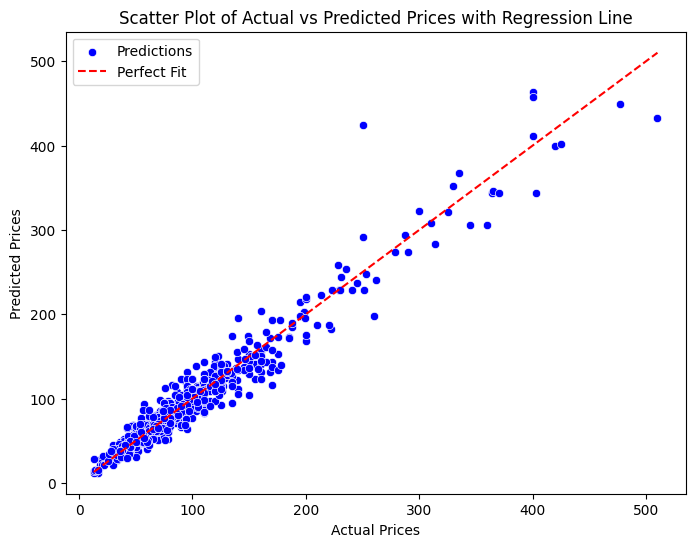

R-squared: 0.9465875668778468
Root Mean Squared Error (RMSE): 14.70782615299525
Mean Absolute Error (MAE): 9.323795381743333


In [94]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


data1 = pd.get_dummies(data, drop_first=True)

X = data1.drop('price', axis=1)
y = data1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgboost_model = xgb.XGBRegressor()


xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgboost, color='blue', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

plt.title("Scatter Plot of Actual vs Predicted Prices with Regression Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()

plt.show()

r2 = r2_score(y_test, y_pred_xgboost)
mse = mean_squared_error(y_test, y_pred_xgboost)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred_xgboost)


print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


In [47]:
import pickle

with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgboost_model, model_file)



In [48]:
data.head(10)

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,131.0,3
5,1st Phase JP Nagar,2180.0,3.0,210.0,3
6,1st Phase JP Nagar,2077.0,3.0,175.0,3
7,1st Phase JP Nagar,1205.0,2.0,85.0,2
8,1st Phase JP Nagar,2615.0,5.0,222.0,4
9,5th Phase JP Nagar,1150.0,3.0,52.5,2


House price Prediction

In [49]:

def predict_price(user_input, model, encoder_columns):
    input_df = pd.DataFrame([user_input])
    
    input_encoded = pd.get_dummies(input_df, drop_first=True)
    
    input_encoded = input_encoded.reindex(columns=encoder_columns, fill_value=0)
    
    predicted_price = model.predict(input_encoded)
    
    return predicted_price[0] 

user_input = {
    'location': '1st Phase JP Nagar',
    'total_sqft': 1590,
    'bath': 3,
    'bhk': 3
}

if user_input['location']  not in data.location :
    user_input['location'] = 'other'

predicted_price = predict_price(user_input,xgboost_model, X.columns)

print(f"Predicted Price: {predicted_price:.2f} lakh")



Predicted Price: 97.57 lakh
